## **Esercitazione 03 - Logbook**
### **Task 1**
Obiettivi: 
- Verificare la serigrafia sull'OpAmp fornito e studiarne il datasheet (modello OP77);
- segnare la piedinatura dell’integrato e le varie connessioni dell’operazionale;
- segnare i valori di alimentazione previsti, e in particolare gli absolute maximum ratings;
- usare il tester per misurare le connessioni di alimentazione. 


Dal datasheet riportiamo:
1. Piedinatura (che leggiamo sul dorso ponendo il notch in alto e in senso antiorario partendo dal pin in alto a sinistra):

<img src='Piedinatura.png' Width=300>

(pag.1 datasheet)


Valori di alimentazione previsti:

| Parametro                     | Valore|       
|:---:|:---:|
| Supply Voltage                            |$\pm$ 22 V|          
| Differential Input Voltage                            |$\pm$ 30 V|          
| Input Voltage                      | $\pm$ 22 V|          

(pag.6 datasheet, tabella absolute maximum ratings)


Utilizzando il seguente codice e connettendo il tester ai pin di alimentazione dell'OpAmp, otteniamo i valori attesi (forniti nel codice, cioè circa 4 V per il polo positivo e circa 3 V per il polo negativo):

```python

In [1]:
import tdwf # importiamo il modulo...
import matplotlib.pyplot as plt
import numpy as np
import time

ad2 = tdwf.AD2() # connessione all’hardware

Digilent WaveForms SDK versione 3.22.2
Dispositivo #1 [SN:210321B5D136, hdwf=1] connesso!
Configurazione #1


In [ ]:
ad2.vdd = +4
ad2.vss =-3
# impostazione voltaggio positivo a +4V
# impostazione voltaggio negativo a-3V
ad2.power(True) # attiva l’alimentatore (False lo spegne)

In [ ]:
ad2.close() #cella di chiusura

### **Task 2**
Obiettivo: Impostare l’alimentatore duale in maniera che fornisca una uscita a +5V e una a −5V rispetto al
 contatto di terra. Verificare i voltaggi effettivi erogati e riportarli sul logbook

In [ ]:
ad2.vdd = +5
ad2.vss =-5
# impostazione voltaggio positivo a +5V
# impostazione voltaggio negativo a-5V
ad2.power(True) # attiva l’alimentatore (False lo spegne)

Dal tester leggiamo questi valori (senza incertezze):

$V_+$ = 4.9886 V

$V_-$ = -4.9923 V

### **Task 3**
Obiettivi:
- Montare il circuito dell'amplificatore invertente con resistenze opportune (come riportato sulla scheda, il cui rapporto sia 10, cioè $R_1 = 2.2 k \Omega $ e $R_2 = 22 k\Omega$);
- Collegare il circuito alla scheda di acquisizione;
- Eseguire i seguenti test sperimentali:
    -  usare un segnale standard (per esempio una sinusoide a 1kHz di ampiezza opportuna) per verificare se l'amplificatore funziona come atteso;
    - studiare che cosa succede quando $V_{out}$ si avvicina alle tensioni di alimentazione

<img src="invertente.png" Width=400>
<img src="circuito_invertente.jpg" Width=400>

In [60]:
#configurazione w1
wgen = tdwf.WaveGen(ad2.hdwf)
wgen.w1.config = ()
wgen.w1.ampl = 0.1
wgen.w1.freq = 1e3
wgen.w1.offs = 0.0
wgen.w1.func = tdwf.funcSine
wgen.w1.start()

ad2.vdd = +5
ad2.vss =-5
ad2.power(True) # attiva l’alimentatore (False lo spegne)

# inizializzazione oscilloscopio
scope = tdwf.Scope(ad2.hdwf) 

scope.fs = 1e5 # => frequenza di sampling impostata a 1MSa/s
scope.npt = 1000 # => acquisizione impostata a 1000 punti
 
scope.ch1.rng = 5 # range Ch1 su [-2.5,+2.5]
scope.ch2.rng = 50 # range Ch2 su [-25,+25], lo mettiamo grande per l'amplificazione

scope.ch1.avg = False 
scope.ch2.avg = False # attiva media su Ch2
scope.sample() # Avvio acquisizione

Abbiamo impostato inizialmente $\texttt{wgen.w1.ampl = 0.01}$, ma la misura del ch2 risulta molto rumorosa, a causa dell'amplificazione del rumore del ch1, come riportato nel plot del seguente codice:

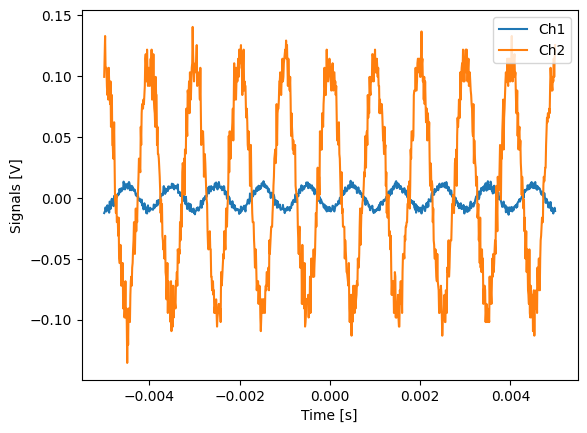

In [ ]:
#plot
plt.plot(scope.time.vals, scope.ch1.vals, label="Ch1")
plt.plot(scope.time.vals, scope.ch2.vals, label = "Ch2")
plt.xlabel("Time [s]")
plt.ylabel("Signals [V]")
plt.legend(loc = "upper right")
#plt.savefig("acquisizione0-1.png")
#plt.savefig("acquisizione0-4.png")
#plt.savefig("no-noise.png")
plt.show()

Notiamo che il rumore può essere ridotto attivando la media sul canale 2 e su canale 1, come mostrato nel seguente grafico (ottenuto con lo stesso codice):

<img src='no-noise.png' Width=600>

Considerando che c'è un'amplificazione di un ordine di grandezza ($V_{out} = -\frac{R_2}{R_1}V_{in}$), abbiamo quindi aumentato l'ampiezza d'onda a $\texttt{wgen.w1.ampl = 0.1}$, ottenendo il seguente grafico (con lo stesso codice):

<img src='acquisizione0-1.png' Width=600>

in cui si evidenzia il carattere invertente del circuito dall'opposizione di fase. 

Abbiamo poi aumentato il segnale di ingresso a 0.45V per avvicinare $V_{out}$ alla tensione di alimentazione, notando che il segnale in uscita tende ad essere quadro, come si vede nella seguente immagine (ottenuta con lo stesso codice):

<img src='acquisizione0-4.png' Width=600>

### **Task 4**
Obiettivi:
- Montare il circuito dell'amplificatore invertente con resistenze opportune (come riportato sulla scheda, il cui rapporto sia 10, cioè $R_1 = 2.2 k \Omega $ e $R_2 = 22 k\Omega$);
- Collegare il circuito alla scheda di acquisizione;
- Eseguire i seguenti test sperimentali:
    -  usare un segnale standard (per esempio una sinusoide a 1kHz di ampiezza opportuna) per verificare se l'amplificatore funziona come atteso;
    - studiare che cosa succede quando $V_{out}$ si avvicina alle tensioni di alimentazione

<img src='non_invertente.png' Width=400> 
<img src='circuito_non-invertente.jpg' Width=400>




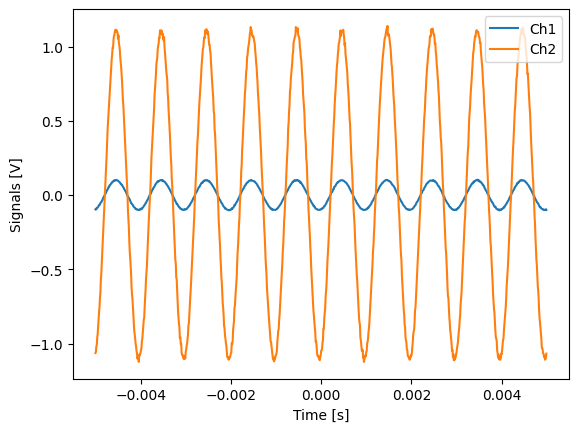

In [61]:
#plot
plt.plot(scope.time.vals, scope.ch1.vals, label="Ch1")
plt.plot(scope.time.vals, scope.ch2.vals, label = "Ch2")
plt.xlabel("Time [s]")
plt.ylabel("Signals [V]")
plt.legend(loc = "upper right")
#plt.savefig("non-inv_0-1.png")
#plt.savefig("non-inv_0-45.png")

plt.show()


In questo caso, si nota bene l'amplificazione di 11 ($V_{out} = (1 + \frac{R_2}{R_1}) V_{in}$) e il fatto che il segnale in uscita non è invertito rispetto a quello in ingresso. 

Portando $V_{out}$ in prossimità della tensione di uscita si ottiene, tramite lo stesso codice:

<img src="non-inv_0-45.png" Width = 600>

Ossia possiamo ancora notare un comportamento che tende ad una quadra. Possiamo quindi concludere che in prossimità della tensione di uscita, il segnale tende a "schiacciarsi" perché, per l'appunto, il dispostivo non può generare in uscita un segnale che superi la tensione di alimentazione.

### **Task 5**
Obiettivi:
-  Realizzare il filtro CRRC studiato nella settimana scorsa, inserendo in questo caso un buffer fra
 i due stadi del filtro;

<img src='buffer.png' Width=400> 
<img src='CRRC.png' Width=400>

-  Verificare che disaccoppia come atteso i due stadi del filtro, facendo in modo che la
 funzione di risposta complessiva sia uguale al prodotto della risposta dei due stadi.

Abbiamo realizzato il circuito del buffer come da schema, utilizzando l'uscita del primo stadio del filtro come ingresso del buffer e l'uscita del buffer come ingresso del secondo stadio del filtro:

<img src="circuito_buffer.jpg" Width=600>

Abbiamo utilizzato i seguenti componenti:
- $R_1$ = 100 kOhm (valore nominale)
- $R_2$ = 1 kOhm (valore nominale)
- $C_1 = (146.2 \pm 3) nF$ (misurata con il tester) => $f_1 (taglio) = 68.39 Hz$
- $C_2 = (46.95 \pm 2) nF$ (misurata con il tester) => $f_2 (taglio) = 21.29 kHz$


Ci aspettiamo che il buffer disaccoppi i due stadi del filtro perché l'OpAmp ha un'impedenza di ingresso idealmente infinita e un'impedenza di uscita idealmente nulla, quindi il secondo stadio non influenza il primo poiché il dispositivo non assorbe corrente dal primo stadio. 
Per verificare ciò abbiamo misurato la risposta in frequenza del filtro completo (con buffer) e abbiamo fatto un fit con una funzione di trasferimento prodotto delle due funzioni di trasferimento dei singoli stadi:
$$ |H(\omega)| = \left| \frac{1}{1 - i\frac{\omega_{p1}}{\omega}} \cdot \frac{1}{1 + i\frac{\omega}{\omega_{p2}}} \right| $$
dove $\omega_{p1} = 2\pi f_1$ e $\omega_{p2} = 2\pi f_2$ sono le pulsazioni di taglio dei due stadi, che sono i parametri liberi del fit.

Abbiamo effettuato le misure tramite il codice $\texttt{sweepfreq.ipynb}$ con i seguenti parametri di acquisizione:

$\texttt{
nper = 10;
npt = 8192;
nf = 350;
f0 = 2e2;
f1 = 2e2;
wavegen.w1.ampl = 2
}$

Per quanto riguarda la stima degli errori, dalla prima acquisizione abbiamo individuato la banda di maggior guadagno; dopodiché abbiamo fissato una frequenza nel centro dell'intervallo a guadagno massimo e preso per essa diverse misure di ampiezza, per poi calcolarne la deviazione standard del campione; abbiamo poi attribuito a tutte le misure iniziali lo stesso errore, sicuramente sottostimandolo per quelle a frequenza più alta, dato che la risposta in frequenza dell'oscilloscopio dell'AD2 peggiora all'aumentare della frequenza.

Di seguito i grafici ottenuti tramite analisi con il codice matlab $\texttt{fit-CRRC-buffer.mlx}$:

<img src="fit_Guadagno_Residui.png" Width=600>

Dal grafico notiamo che i residui sono correlati, mentre dal grafico di fit si osserva come nella parte finale del Bode (ad alte frequenze) sia presente un ulteriore roll off posizionato attorno a 100 kHz.

Il fit ci fornisce i seguenti parametri:
| Parametro | Valore | Valore atteso|
|:---:|:---:|:---:|
| ${\chi}^2_{rid}$       | $35682.5 \pm 0.1$ | 1|
| $f_1(taglio)$     | $20940.8  \pm 0.2$ kHz | 21.29 kHz|   
| $f_2(taglio)$     | $68.503  \pm 0.001$ Hz | 68.39 Hz|

L'altissimo valore del chi quadro ridotto è un'ulteriore conferma del fatto che il modello non è in grado di spiegare l'andamento dei dati raccolti. Tuttavia, i valori dei parametri ottenuti dal fit sono indicativamente in accordo con quelli attesi, nonostante, vista la correlazione dei residui, l'incertezza ad essi associati non sia significativa; tuttavia tale accordo ci suggerisce che in effetti le due maglie siano effettivamente disaccoppiate e che il disaccordo tra modello e dati sia dovuto, quasi sicuramente, a delle non idealità dell'OpAmp.

Infatti, anche ripetendo il fit escludendo le frequenze successive all'ulteriore roll off del Bode, otteniamo risultati simili, con un chi quadro ridotto ancora molto alto, ma ancora con i parametri in accordo con quelli attesi:

<img src="fit_Guadagno_Residui_cut.png" Width=600>

| Parametro | Valore | Valore atteso|
|:---:|:---:|:---:|
| ${\chi}^2_{rid}$       | $1721.1  \pm 0.1$ | 1|
| $f_1(taglio)$     | $21159.7   \pm 0.3$ kHz | 21.29 kHz|
| $f_2(taglio)$     | $68.487   \pm 0.001$ Hz | 68.39 Hz|

Come si evince da quest'ultimo grafico dei residui, il modello prevede un guadagno maggiore nella banda di maximum gain rispetto a quello misurato, mentre invece il trend si inverte fuori da essa (gain atteso minore del gain misurato), rendendo ancora più ragionevole l'ipotesi della rilevanza delle non idealità dell'OpAmp.

Conferma di tale ipotesi è data dal roll off osservato nel primo grafico dei residui, dovuto all'integratore integrato nell'OpAmp per tagliare le alte frequenze, alle quali, a causa delle sue non idealità, l'OpAmp potrebbe trasformare il feedback inserito nel ramo che collega ingresso ed uscita, da positivo a negativo a causa di uno sfasamento tra segnali in uscita ed ingresso maggiore o uguale di $\pi$.